In [1]:
%pip install bnlearn pandas scikit-learn matplotlib seaborn


  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     ------------------------------------ - 194.6/204.6 kB 5.8 MB/s eta 0:00:01
     -------------------------------------- 204.6/204.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/70.8 kB ? eta -:--:--
   ---------------------------------------- 70.8/70.8 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/51.3 kB ? eta -:--:--
   ---------------------------------------- 51.3/51.3 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/139.8 kB ? eta -:

In [2]:
import pandas as pd
import bnlearn as bn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
# Load dataset
course_grades = pd.read_csv('2020_bn_nb_data.txt', sep='\t')  # Assuming tab-separated values

# Preview dataset
course_grades.head()


,EC100,EC160,IT101,IT161,MA101,PH100,PH160,HS101,QP
0,BC,CC,BB,BC,CC,BC,AA,BB,y
1,CC,BC,BB,BB,CC,BC,AB,BB,y
2,AB,BB,AB,AB,BB,CC,BC,AB,y
3,BC,CC,BB,BB,BB,BB,BC,BB,y
4,BC,AB,CD,BC,BC,BC,BC,CD,y


In [6]:
# Convert all columns to categorical
for col in course_grades.columns:
    course_grades[col] = course_grades[col].astype('category')


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


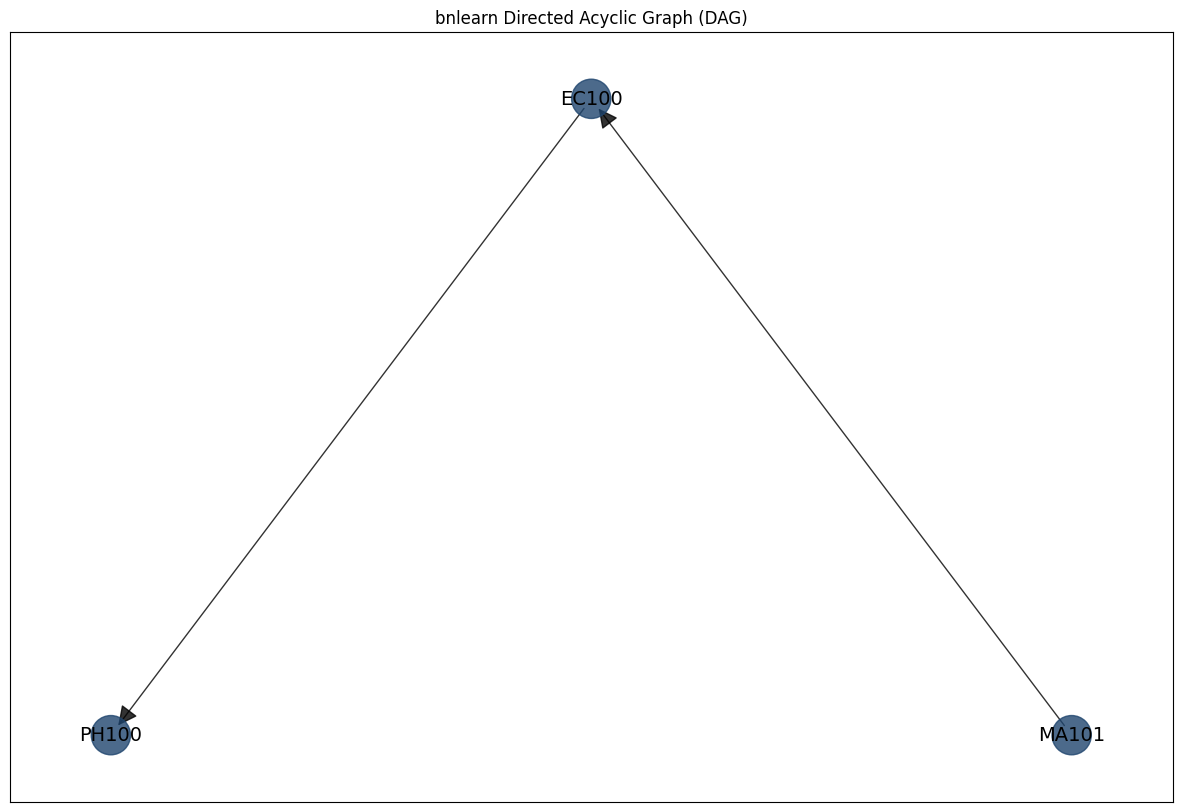

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'EC100': array([1.09976079e-17, 1.00000000e+00]),
  'PH100': array([-0.8660254, -0.5      ]),
  'MA101': array([ 0.8660254, -0.5      ])},
 'G': <networkx.classes.digraph.DiGraph at 0x21f0a07c590>,
 'node_properties': {'EC100': {'node_color': '#1f456e', 'node_size': 800},
  'EC160': {'node_color': '#1f456e', 'node_size': 800},
  'IT101': {'node_color': '#1f456e', 'node_size': 800},
  'IT161': {'node_color': '#1f456e', 'node_size': 800},
  'MA101': {'node_color': '#1f456e', 'node_size': 800},
  'PH100': {'node_color': '#1f456e', 'node_size': 800},
  'PH160': {'node_color': '#1f456e', 'node_size': 800},
  'HS101': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('EC100', 'PH100'): {'color': '#000000', 'weight': 1},
  ('MA101', 'EC100'): {'color': '#000000', 'weight': 1}}}

In [7]:
# Build the structure using hill climbing (hc)
model = bn.structure_learning.fit(course_grades.drop(columns=['QP']))  # Dropping target column

# Plot the learned structure
bn.plot(model)


In [14]:
# Fit the Bayesian network
model_fitted = bn.parameter_learning.fit(model, course_grades.drop(columns=['QP']))

# Print the fitted parameters
print(model_fitted)


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of EC100:
+-----------+---------------------+-----+---------------------+
| MA101     | MA101(AA)           | ... | MA101(F)            |
+-----------+---------------------+-----+---------------------+
| EC100(AA) | 0.14437984496124032 | ... | 0.11160714285714286 |
+-----------+---------------------+-----+---------------------+
| EC100(AB) | 0.12112403100775193 | ... | 0.11160714285714286 |
+-----------+---------------------+-----+---------------------+
| EC100(BB) | 0.12887596899224807 | ... | 0.11160714285714286 |
+-----------+---------------------+-----+---------------------+
| EC100(BC) | 0.12112403100775193 | ... | 0.11160714285714286 |
+-----------+---------------------+-----+---------------------+
| EC100(CC) | 0.12112403100775193 | ... | 0.11160714285714286 |
+-----------+

In [17]:
# Conditional probability distribution based on some evidence

# Check nodes in the model
print("Nodes in the model:", model_fitted['model'].nodes())

# Define evidence ensuring nodes exist in the model
evidence = {'EC100': 'DD', 'MA101': 'CD'}  # Removed 'IT101' as it is not in the model
cpdist_result = bn.inference.fit(model_fitted, variables=['PH100'], evidence=evidence)

# Show the result
print(cpdist_result)


Nodes in the model: ['EC100', 'PH100', 'MA101']
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    | PH100   |        p |
+====+=========+==========+
|  0 | AA      | 0.107759 |
+----+---------+----------+
|  1 | AB      | 0.107759 |
+----+---------+----------+
|  2 | BB      | 0.114655 |
+----+---------+----------+
|  3 | BC      | 0.107759 |
+----+---------+----------+
|  4 | CC      | 0.135345 |
+----+---------+----------+
|  5 | CD      | 0.169828 |
+----+---------+----------+
|  6 | DD      | 0.135345 |
+----+---------+----------+
|  7 | F       | 0.121552 |
+----+---------+----------+
+-----------+--------------+
| PH100     |   phi(PH100) |
+===========+==============+
| PH100(AA) |       0.1078 |
+-----------+--------------+
| PH100(AB) |       0.1078 |
+-----------+--------------+
| PH100(BB) |       0.1147 |
+-----------+--------------+
| PH100(BC) |       0.1

In [30]:
# Inspect the structure of cpdist_result
print(cpdist_result)

# Initialize cpdist_df to None
cpdist_df = None

# Convert cpdist_result to a DataFrame based on its type
if isinstance(cpdist_result, dict):
    # If the result is a dictionary, convert it into a DataFrame
    cpdist_df = pd.DataFrame.from_dict(cpdist_result, orient='index').reset_index()
    cpdist_df.columns = ['PH100', 'p']  # Rename columns if necessary

elif isinstance(cpdist_result, list):
    # If the result is a list of dictionaries, create a DataFrame directly
    cpdist_df = pd.DataFrame(cpdist_result)

else:
    print("cpdist_result is neither a dictionary nor a list. Please check the output.")

# Check if cpdist_df was created successfully
if cpdist_df is not None:
    # Display the first few rows of the DataFrame to understand its structure
    print(cpdist_df.head())

    # Ensure 'PH100' and the probability column are present for plotting
    if 'PH100' in cpdist_df.columns and 'p' in cpdist_df.columns:
        # Plot the result
        sns.barplot(x='PH100', y='p', data=cpdist_df)
        plt.title('Conditional Probability Distribution of PH100')
        plt.xlabel('PH100')
        plt.ylabel('Probability')
        plt.show()
    else:
        print("The cpdist_df does not contain the expected columns 'PH100' and 'p'.")
else:
    print("cpdist_df was not created.")


+-----------+--------------+
| PH100     |   phi(PH100) |
+===========+==============+
| PH100(AA) |       0.1078 |
+-----------+--------------+
| PH100(AB) |       0.1078 |
+-----------+--------------+
| PH100(BB) |       0.1147 |
+-----------+--------------+
| PH100(BC) |       0.1078 |
+-----------+--------------+
| PH100(CC) |       0.1353 |
+-----------+--------------+
| PH100(CD) |       0.1698 |
+-----------+--------------+
| PH100(DD) |       0.1353 |
+-----------+--------------+
| PH100(F)  |       0.1216 |
+-----------+--------------+
cpdist_result is neither a dictionary nor a list. Please check the output.
cpdist_df was not created.


In [32]:
# Initialize accuracy results
accuracies = []

# Perform cross-validation 20 times
for i in range(20):
    # Split dataset into 70% training and 30% testing
    train_data, test_data = train_test_split(course_grades, test_size=0.3, random_state=i)
    
    # Initialize Naive Bayes classifier
    model = GaussianNB()

    # Separate features and target for training
    X_train = train_data.drop(columns=['QP'])
    # Convert target column 'QP' to numerical values
    train_data['QP'] = train_data['QP'].cat.codes
    test_data['QP'] = test_data['QP'].cat.codes

    # Separate features and target for training
    X_train = train_data.drop(columns=['QP'])
    y_train = train_data['QP']

    X_test = test_data.drop(columns=['QP'])
    y_test = test_data['QP']

    # Train the classifier
    model.fit(X_train, y_train)

    # Predict on test data
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

    print(f"Accuracy for iteration {i+1}: {accuracy * 100:.2f}%")

# Average accuracy over 20 iterations
average_accuracy = sum(accuracies) / len(accuracies)
print(f"Average Accuracy: {average_accuracy * 100:.2f}%")


TypeError: unsupported operand type(s) for /: 'str' and 'int'